# Test Out Resevoir Computing

In [1]:
!pip install reservoirpy

  Obtaining dependency information for reservoirpy from https://files.pythonhosted.org/packages/a4/e2/934257276635aae5ddeee31bd0c07187baa43a34a26b38e2beade5257cda/reservoirpy-0.3.11-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.9/176.9 kB 2.9 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import reservoirpy as rpy

rpy.verbosity(0)  # no need to be too verbose here
rpy.set_seed(42)  # make everything reproducible !

In [5]:
from reservoirpy.nodes import Reservoir

reservoir = Reservoir(100, lr=0.5, sr=0.9)

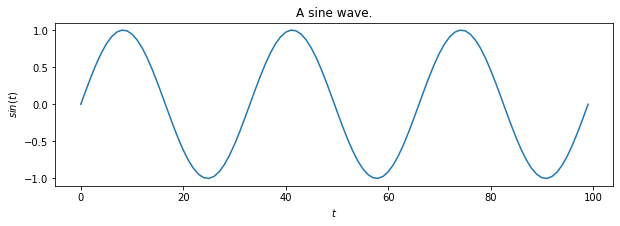

In [6]:
import numpy as np
import matplotlib.pyplot as plt

X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)

plt.figure(figsize=(10, 3))
plt.title("A sine wave.")
plt.ylabel("$sin(t)$")
plt.xlabel("$t$")
plt.plot(X)
plt.show()

In [7]:
s = reservoir(X[0].reshape(1, -1))

print("New state vector shape: ", s.shape)

New state vector shape:  (1, 100)


In [10]:
s = reservoir.state()
s

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.38079708,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.38079708,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.38079708,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.38079708,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.38079708,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [12]:
states = np.empty((len(X), reservoir.output_dim))
for i in range(len(X)):
    states[i] = reservoir(X[i].reshape(1, -1))

states

array([[-0.26783572,  0.20222842,  0.31680127, ...,  0.1176902 ,
        -0.64956117, -0.00661463],
       [-0.26936208,  0.1399847 ,  0.33206003, ...,  0.09803485,
        -0.66788166, -0.01016887],
       [-0.27382411,  0.06649539,  0.3451406 , ...,  0.07345739,
        -0.68562845, -0.01837796],
       ...,
       [-0.27239823,  0.43860402,  0.25096813, ...,  0.14455629,
        -0.58881009, -0.00728161],
       [-0.269788  ,  0.37631975,  0.27207939, ...,  0.14236558,
        -0.6061605 , -0.00585981],
       [-0.26811254,  0.29612946,  0.29449726, ...,  0.133384  ,
        -0.62676607, -0.00543222]])

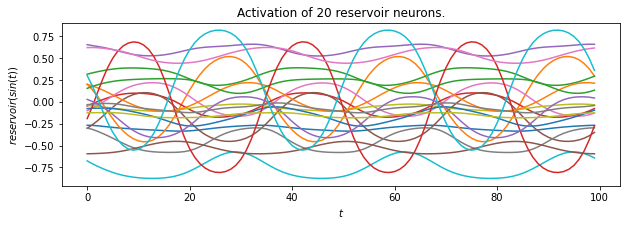

In [13]:
plt.figure(figsize=(10, 3))
plt.title("Activation of 20 reservoir neurons.")
plt.ylabel("$reservoir(sin(t))$")
plt.xlabel("$t$")
plt.plot(states[:, :20])
plt.show()

In [14]:
states = reservoir.run(X)

In [15]:
from reservoirpy.nodes import Reservoir, Ridge, FORCE, ESN

In [18]:
states_from_null = reservoir.run(X, reset=True)


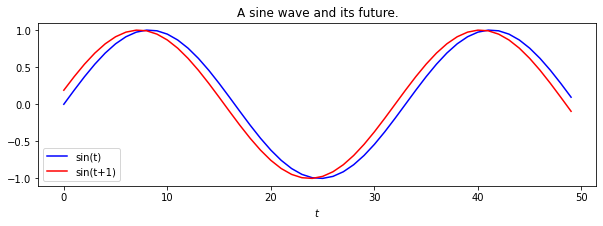

In [19]:
X_train = X[:50]
Y_train = X[1:51]

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(X_train, label="sin(t)", color="blue")
plt.plot(Y_train, label="sin(t+1)", color="red")
plt.legend()
plt.show()

In [21]:
from reservoirpy.nodes import Ridge

readout = Ridge(ridge=1e-7)

In [22]:
train_states = reservoir.run(X_train, reset=True)
readout = readout.fit(train_states, Y_train, warmup=10)

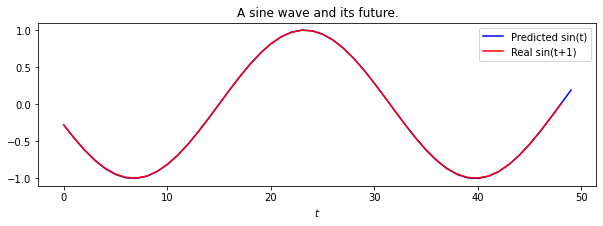

In [23]:
test_states = reservoir.run(X[50:])
Y_pred = readout.run(test_states)

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted sin(t)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show()